In [176]:
import argparse
import os
import random
import shutil
import time
import warnings

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torch.nn.functional as F

from torch.utils import data
import random
import numpy as np
from itertools import product
import argparse

from train_f import *
from Dataset import Dataset
#from Models import *
# from Models2 import *
from Models3 import *
# from Models4 import *
from args import args

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [177]:
state_dict = torch.load('check_pt/weight1_clf_t3_mv1_max_filter2.pth')

In [1]:
'''

'''
dim = 1
model = R2Unet(dim, dim, t = 3, reg = 0).to(device) 
model.load_state_dict(state_dict)
criterion = nn.CrossEntropyLoss(weight = get_loss_weight(1, num_class= 2)).to(device) ##Models3
# inputs = torch.randn(1, 1, 32, 32, 32).uniform_(0, 1)
# output = model(inputs)

NameError: name 'R2Unet' is not defined

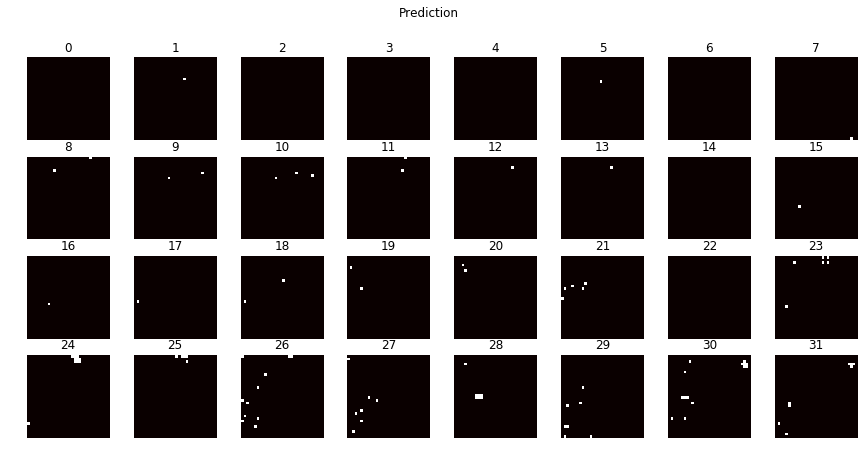

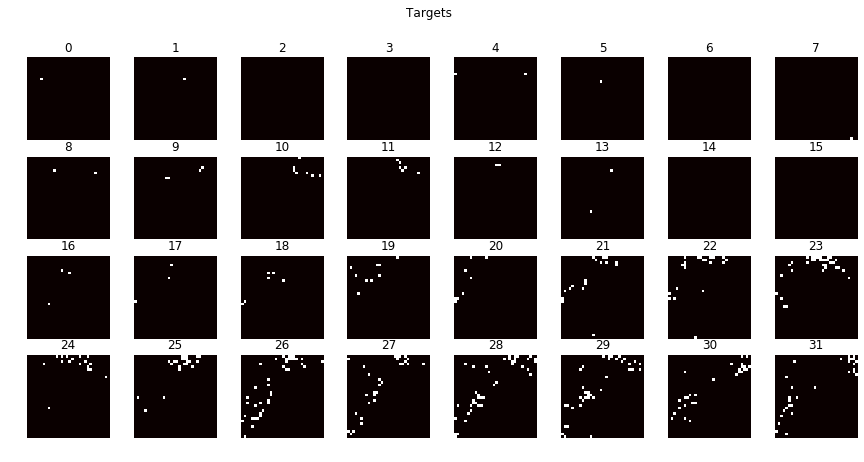

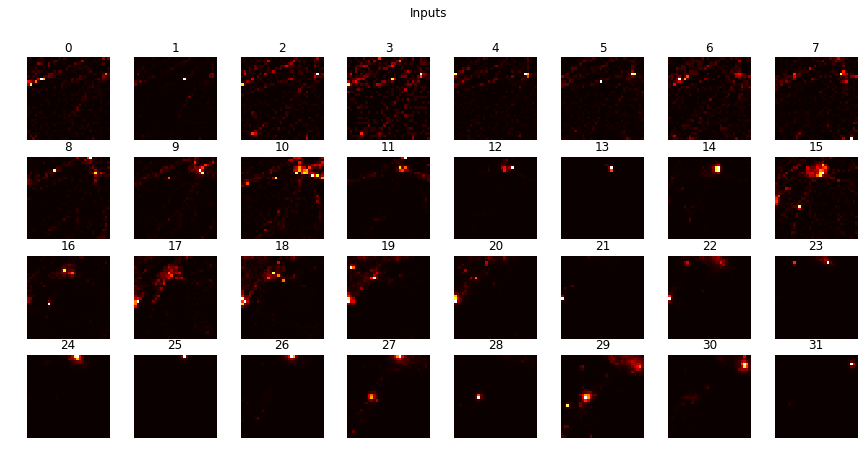

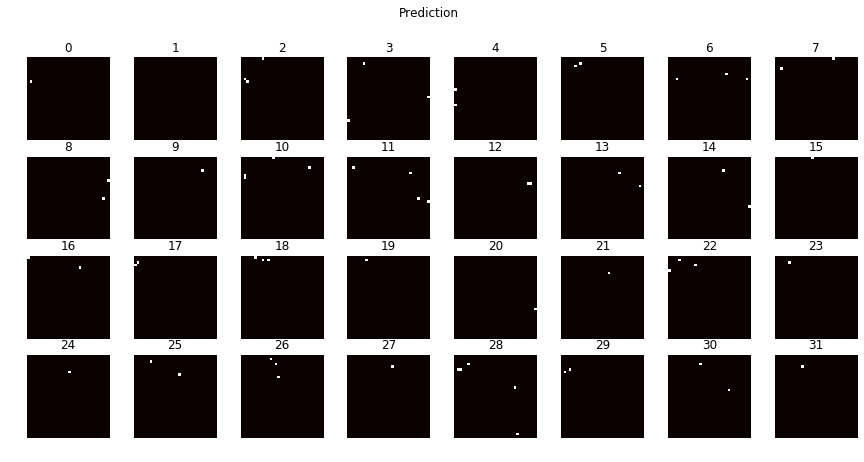

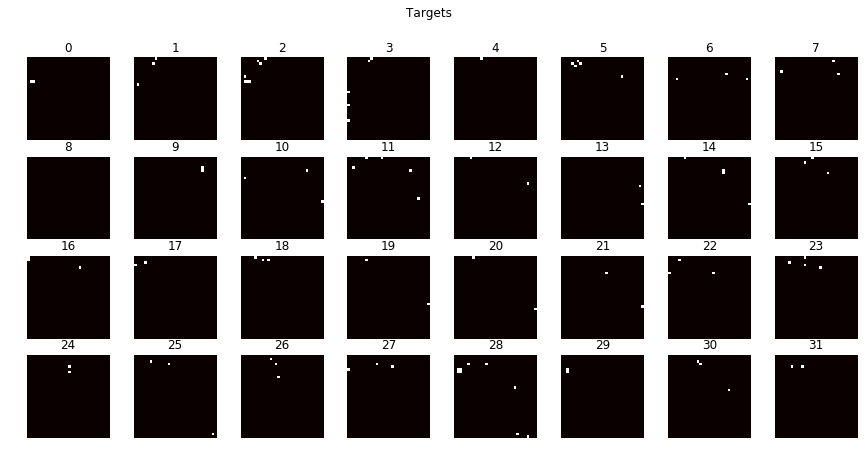

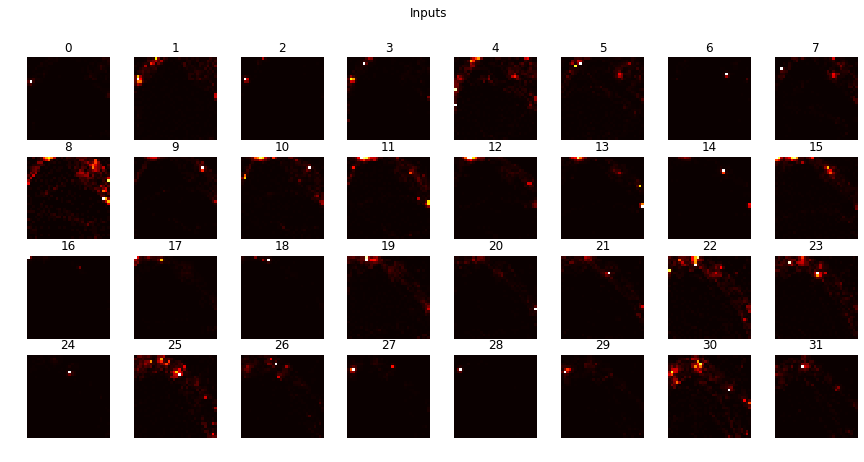

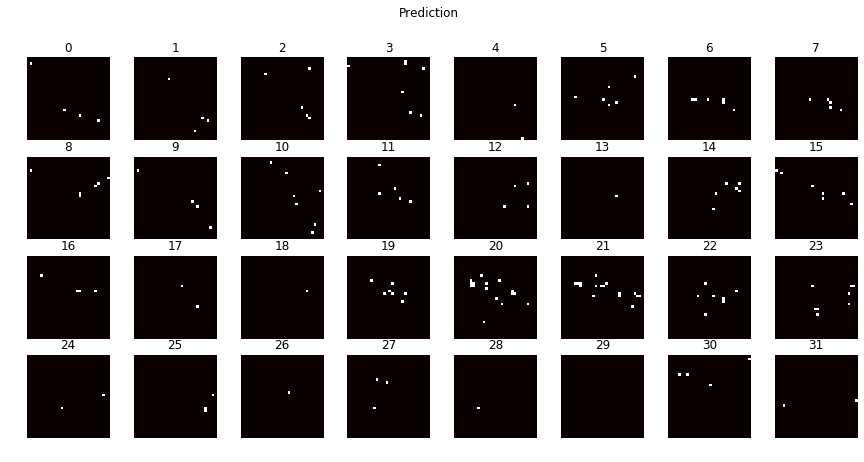

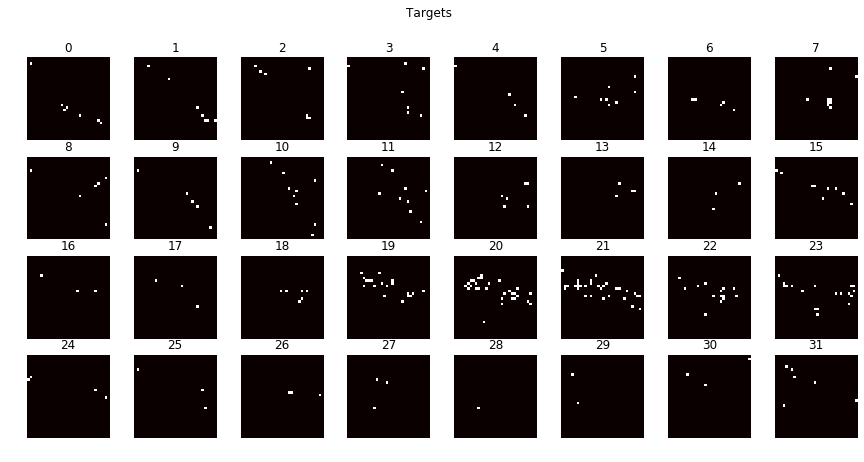

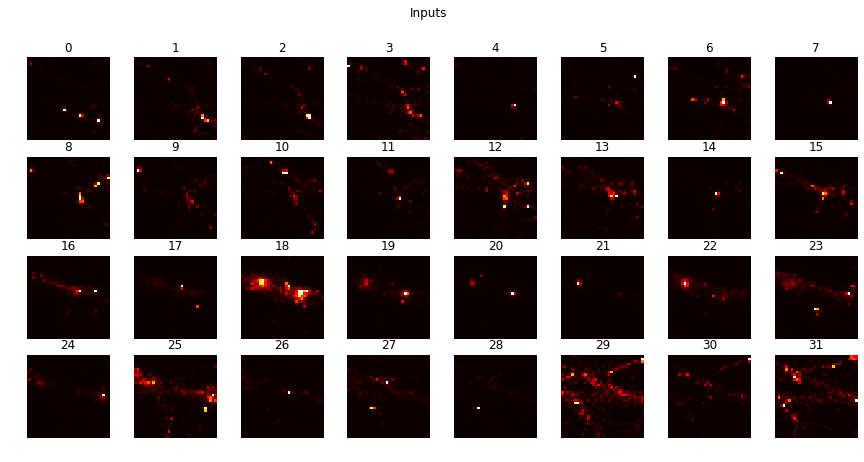

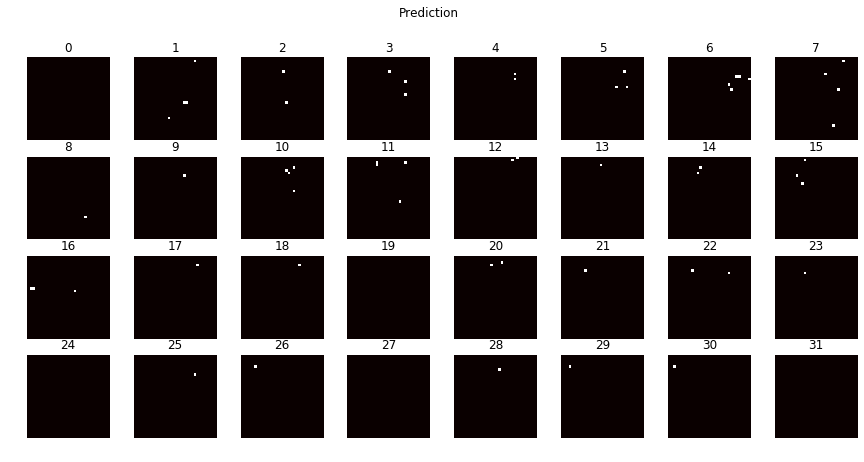

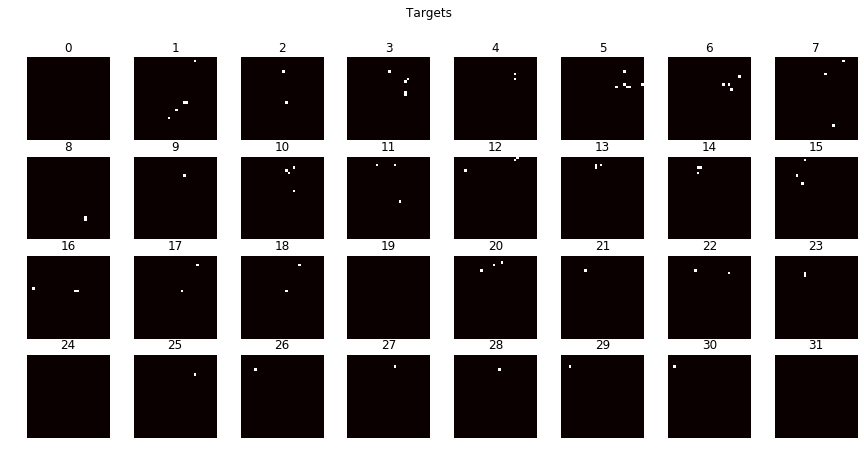

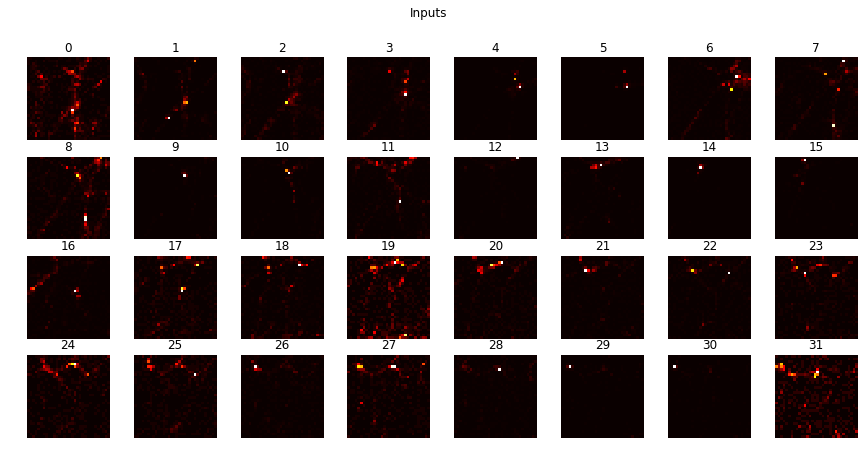

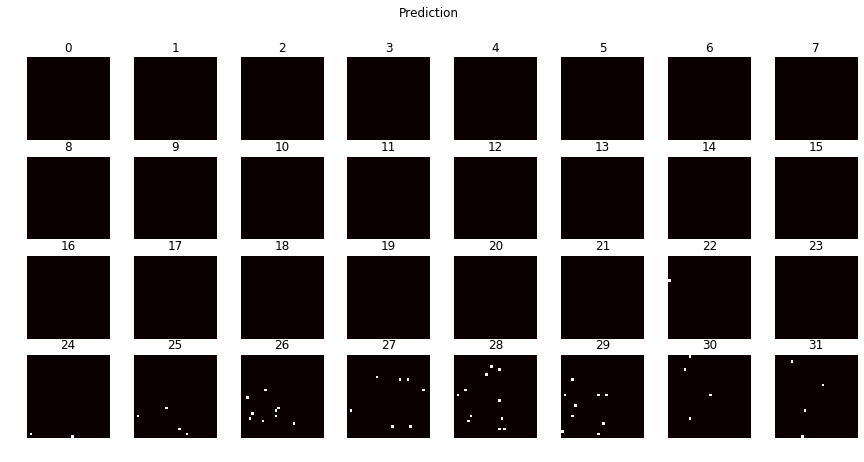

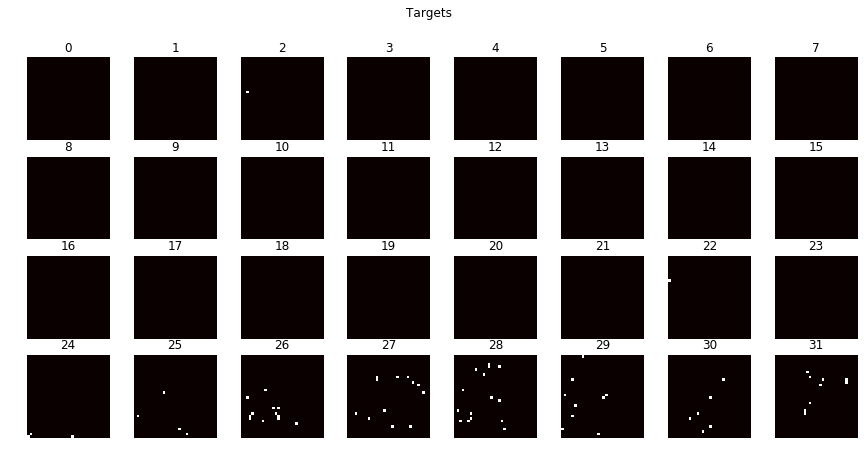

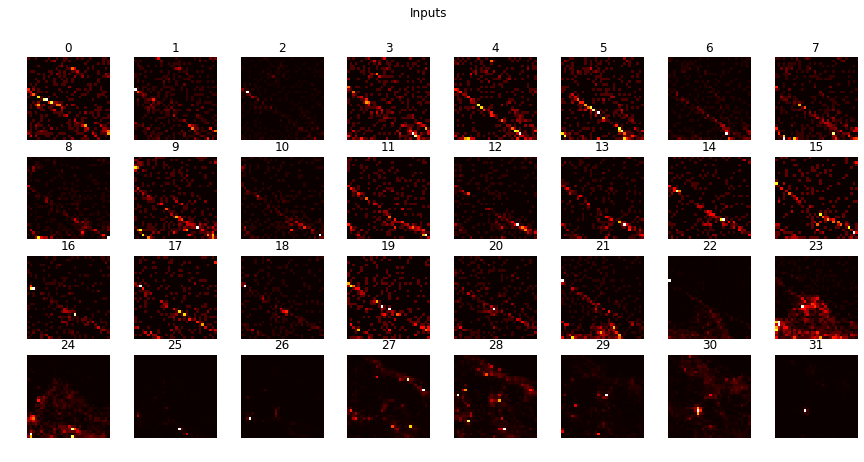

In [180]:
import matplotlib.pyplot as plt

##add on after defining Dataloader and Model

def visualize(predicted,target,inputs):
#     outputs = F.softmax(output, dim=1)
#     predicted = outputs.max(1, keepdim=True)[1]
    
    fig, axs = plt.subplots(4,8,figsize=(15,7))
    axs = axs.reshape(-1)
    fig.suptitle('Prediction')
    for i in range(32):
        img_arr = predicted[0,0,i,:,:]
        axs[i].imshow(img_arr, cmap='hot')
        axs[i].set_title('%d'%i)
        axs[i].set_axis_off()

    fig, axs = plt.subplots(4,8,figsize=(15,7))
    axs = axs.reshape(-1)
    fig.suptitle('Targets')
    for i in range(32):
        img_arr = target[0,i,:,:]
        axs[i].imshow(img_arr, cmap='hot')
        axs[i].set_title('%d'%i)
        axs[i].set_axis_off()

    fig, axs = plt.subplots(4,8,figsize=(15,7))
    axs = axs.reshape(-1)
    fig.suptitle('Inputs')
    for i in range(32):
        img_arr = inputs[0,0,i,:,:]
        axs[i].imshow(img_arr, cmap='hot')
        axs[i].set_title('%d'%i)
        axs[i].set_axis_off()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#test_data=[(736, 256, 288), (800, 704, 288), (480, 480, 544), (608, 736, 736), (480, 928, 32)]
test_data=[(512, 64, 800), (480, 192, 96), (704, 96, 896), (384, 672, 448), (64, 640, 384)]
# #build dataloader
params = {'batch_size': 1,
      'shuffle': False,
      'num_workers':20}
testing_set= Dataset(test_data)
testing_generator = data.DataLoader(testing_set, **params)

model.eval()
with torch.no_grad():
    for i, (inputs, target) in enumerate(testing_generator):
        inputs = inputs.unsqueeze(dim = 1).to(device).float()
        target = target.to(device).long()  
        output = model(inputs)
        outputs = F.softmax(output, dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        dm_mean=5.614541471004486
        visualize(predicted,target,inputs) #*dm_mean+dm_mean)

In [127]:
def get_loss_weight(loss_weight, num_class):
    piece = 1/((num_class - 1) * loss_weight + 1)
    a = [1]
    a.extend([loss_weight] * (num_class - 1))
    return (torch.from_numpy(piece * np.array(a))).float()

In [150]:
get_loss_weight(, 2)

tensor([0.3333, 0.6667])